- Họ và tên: Phạm Thị Hoà
- MSSHV: 23C23007
- Ngành: Lý Thuyết Xác Suất và Thống Kê Toán Học

In [1]:
library(ggplot2)
library(boot)
set.seed(42)

## BÀI TẬP 5:


Xem xét một biến ngẫu nhiên có phân phối chuẩn N(36,8^2).
- (a) Tạo ngẫu nhiên một mẫu với cỡ n = 200 từ phân phối này, hãy tính trung bình và độ lệch chuẩn mẫu,
từ đây, suy ra phân phối mẫu cho trung bình mẫu;
- (b) áp dụng phương pháp bootstrap để xác định phân phối mẫu của mẫu vừa tạo, và so sánh với phân phối mẫu được xác định bằng lý thuyết;
- (c) lặp lại các thao tác trong câu(a)và(b)cho trường hợp cỡmẫu n=50 và n=10,nhận xét kết quả.

In [2]:
# Định nghĩa hàm thống kê để tính trung bình của mẫu bootstrap
boot_mu_fun <- function(data, indices) {
  sample <- data[indices]  # Lấy mẫu con từ mẫu gốc
  return(mean(sample))     # Trả về trung bình của mẫu con
}

In [3]:
# Định nghĩa hàm full_function: bao gồm đầy đủ các bước: 
# - (a) Tạo ngẫu nhiên một mẫu với cỡ n = 200, từ phân phối này, hãy tính trung bình và độ lệch chuẩn mẫu, từ đây, suy ra phân phối mẫu cho trung bình mẫu;
# - (b) Áp dụng phương pháp bootstrap để xác định phân phối mẫu của mẫu vừa tạo, và so sánh với phân phối mẫu được xác định bằng lý thuyếtNhập vào mean, sd và n

full_function <- function(mean, sd, n) {
    # Tạo mẫu n giá trị với trung bình = mean và độ lệch chuẩn = sd
    sample <- rnorm(n, mean = mean, sd = sd)

    # Xem 10 mẫu đầu tiên
    cat("10 mau dau tien:\n", sample[1:10], "\n")

    # Tính trung bình và độ lệch chuẩn của mẫu từ dữ liệu vừa được tạo
    sample_mean <- mean(sample)
    sample_sd <- sd(sample)
    # In kết quả
    cat("Trung binh cua mau:", sample_mean, "\n")
    cat("Do lech chuan cua mau:", sample_sd, "\n")

    # Suy ra phân phối của trung bình mẫu
    # Với trung bình của mẫu là sample_mean và độ lệch chuẩn của mẫu là sample_sd,
    # phân phối của trung bình mẫu là một phân phối chuẩn với:
    # trung bình = sample_mean 
    # và độ lệch chuẩn = sample_sd/ sqrt(n)
    population_mean <- sample_mean
    population_sd <- sample_sd / sqrt(n)

    cat("Phan phoi cho trung binh mau: mean =", population_mean, ", sd =", population_sd, "\n")

    # Vẽ histogram của mẫu
    hist(sample, main = "Histogram cua mau", xlab = "Gia tri", ylab = "Tan suat", col = "skyblue", border = "#EEF1F2")
    
    # Sử dụng hàm boot() để thực hiện bootstrap
    boot_result <- boot(data = sample, statistic = boot_mu_fun, R = 1000)
    # Hiển thị kết quả boostrao
    print(boot_result)
    # Vẽ histogram của các trung bình mẫu bootstrap
    hist(boot_result$t, main = "Phan phoi bootstrap cua trung binh mau", xlab = "Trung binh mau", ylab = "Tan suat", col = "skyblue", border = "#5EC0C5")

    # So sánh phân phối mẫu bootstrap với phân phối lý thuyết của trung bình mẫu
    abline(v = population_mean, col = "red", lwd = 2)
}

### Với n = 200

10 mau dau tien:
 46.96767 31.48241 38.90503 41.0629 39.23415 35.151 48.09218 35.24273 52.14739 35.49829 
Trung binh cua mau: 35.78012 
Do lech chuan cua mau: 7.796681 
Phan phoi cho trung binh mau: mean = 35.78012 , sd = 0.5513086 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sample, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original        bias    std. error
t1* 35.78012 -0.0001104168   0.5522837


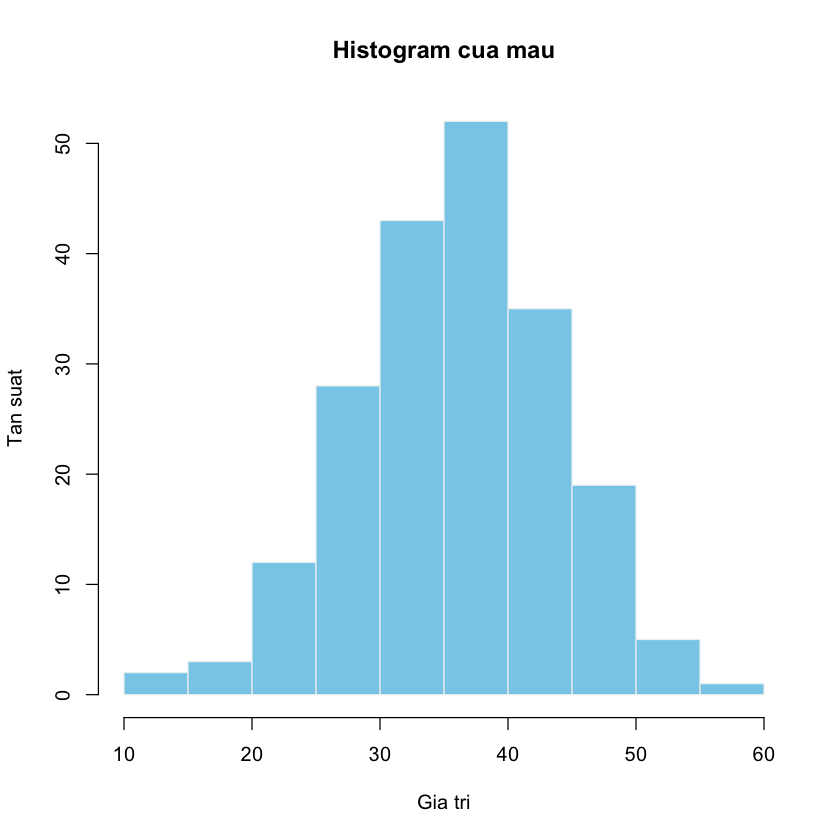

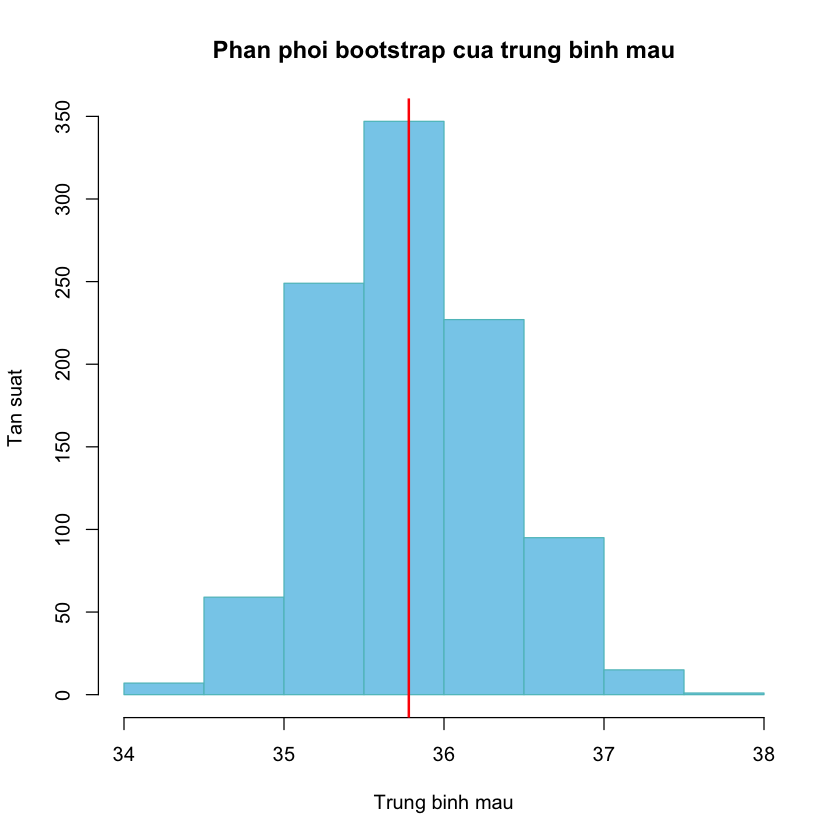

In [4]:
# Trung bình = 36
mean = 36
# Độ lệch chuẩn = 8
sd = 8
# Cỡ mẫu n = 200
n = 200
# Gọi hàm full_function
full_function(mean = mean, sd = sd, n = n)

### Với n = 50

10 mau dau tien:
 32.03188 41.67769 35.18618 47.48647 44.3156 28.49954 33.89983 34.54267 38.83608 31.9085 
Trung binh cua mau: 36.07736 
Do lech chuan cua mau: 8.431022 
Phan phoi cho trung binh mau: mean = 36.07736 , sd = 1.192327 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sample, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 36.07736 0.01751348    1.185164


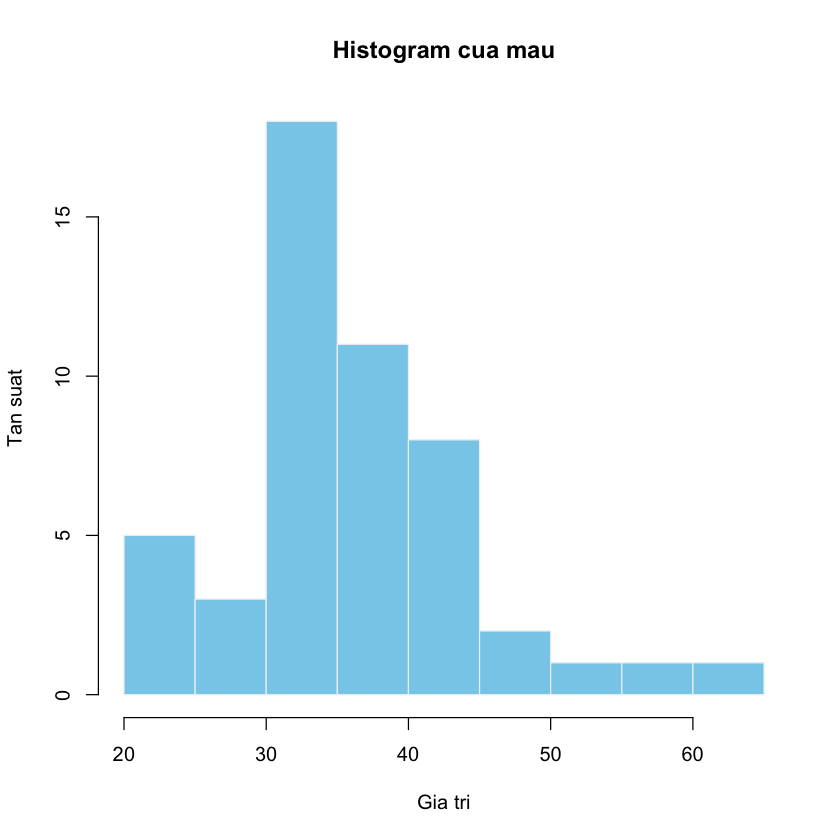

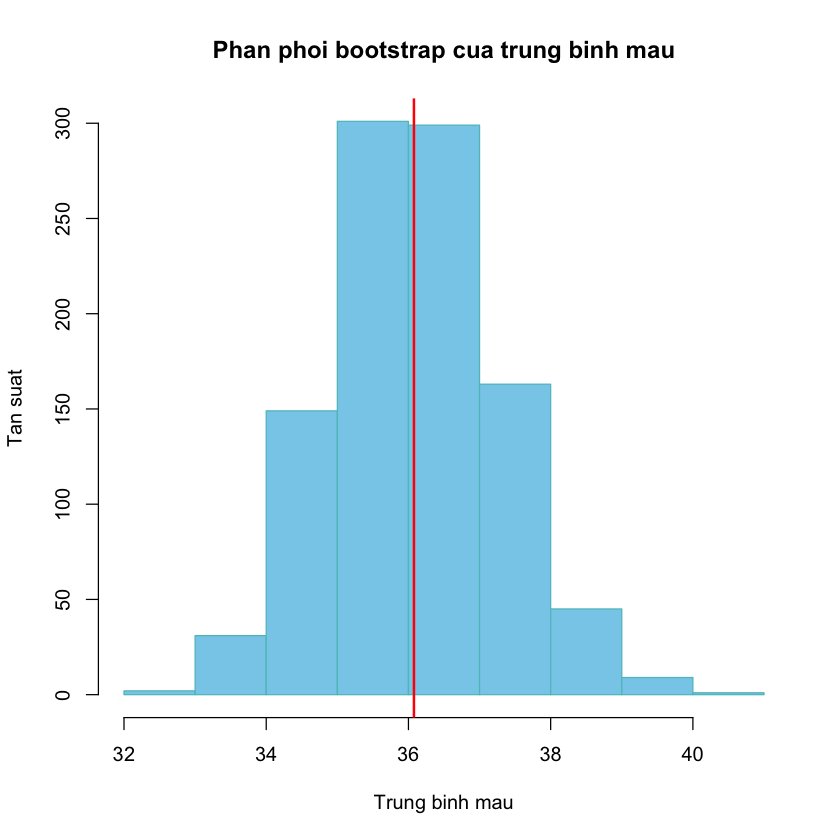

In [5]:
# Trung bình = 36
mean = 36
# Độ lệch chuẩn = 8
sd = 8
# Cỡ mẫu n = 50
n = 50
# Gọi hàm full_function
full_function(mean = mean, sd = sd, n = n)

### Với n = 10

10 mau dau tien:
 43.05788 36.79244 43.83317 33.12166 27.76238 43.52814 24.77055 50.55775 42.75142 22.50863 
Trung binh cua mau: 36.8684 
Do lech chuan cua mau: 9.444002 
Phan phoi cho trung binh mau: mean = 36.8684 , sd = 2.986456 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sample, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1*  36.8684 0.06253599    2.852678


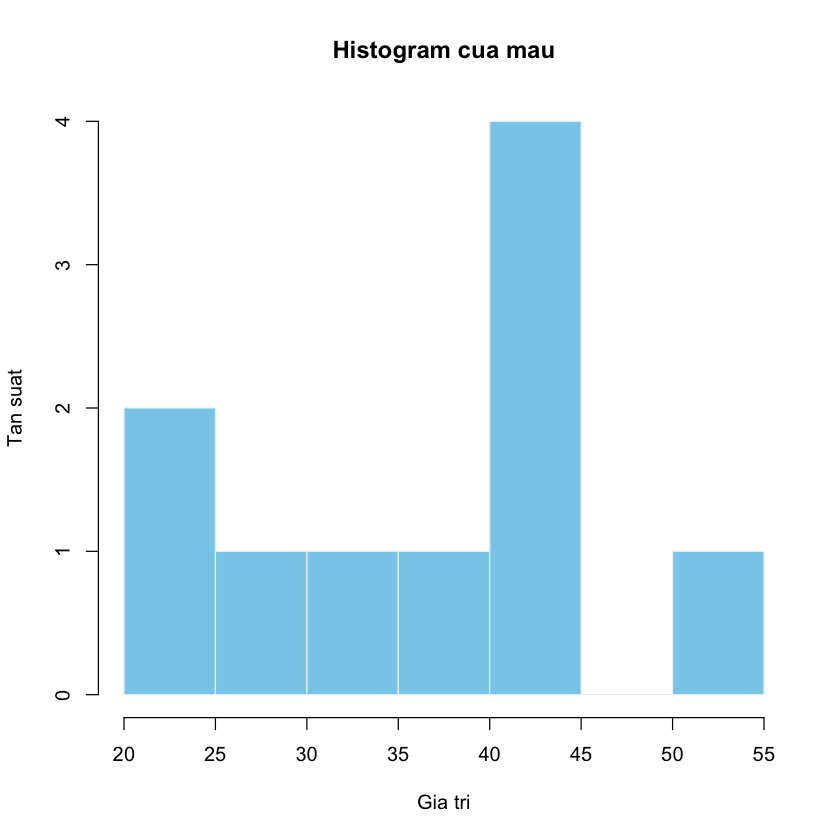

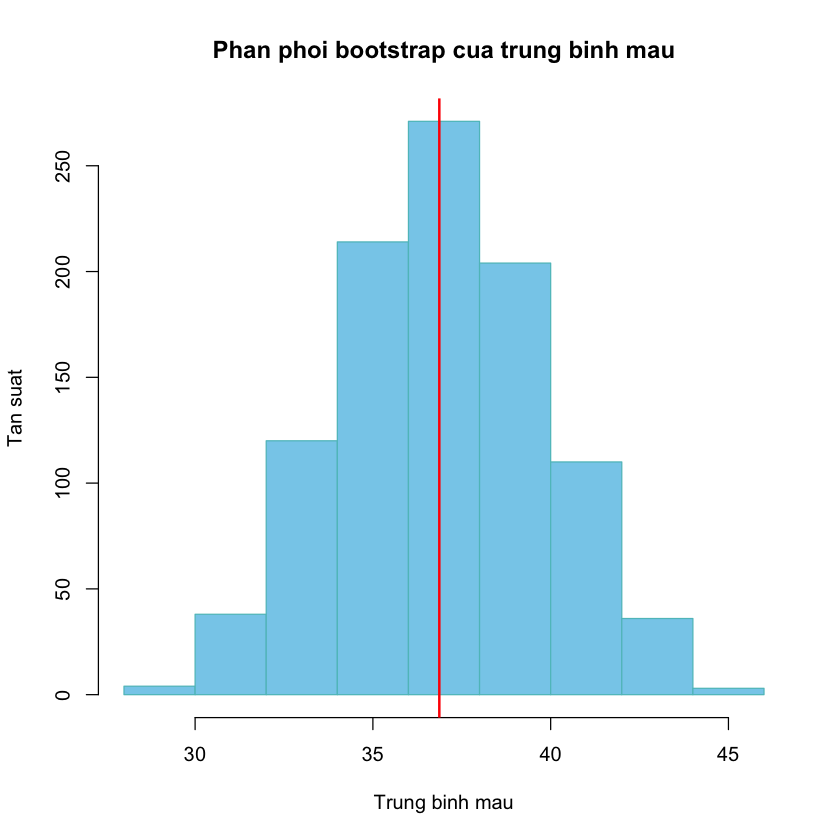

In [6]:
# Trung bình = 36
mean = 36
# Độ lệch chuẩn = 8
sd = 8
# Cỡ mẫu n = 50
n = 10
# Gọi hàm full_function
full_function(mean = mean, sd = sd, n = n)

### Nhận xét:
- Đối với kích thước mẫu n càng lớn, phân phối có độ lệch chuẩn càng nhỏ và giá trị trung bình gần với giá trị trung bình lý thuyết hơn. 

## BÀI TẬP 6

In [7]:
base_path <- getwd()
setwd(base_path)

In [8]:
# Đường dẫn lưu trữ dữ liệu
# brucellosis_data <- read.csv("brucellosis.csv")
path <- paste(base_path, "datasets/brucellosis.csv", sep ="/")
brucellosis_data <- read.csv(file = path)
head(brucellosis_data)

,scores,group
,<int>,<int>
1,75,0
2,70,0
3,78,0
4,68,0
5,62,0
6,75,0


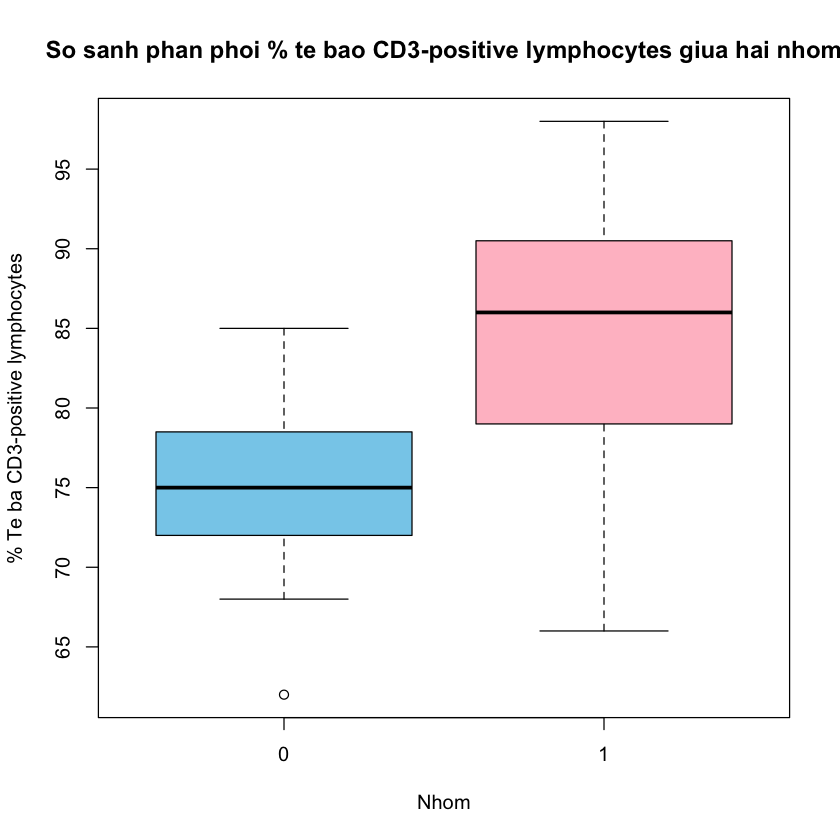

In [9]:
# Vẽ boxplot để so sánh phân phối của % tế bào CD3-positive lymphocytes giữa hai nhóm
boxplot(scores ~ group, data = brucellosis_data, 
        main = "So sanh phan phoi % te bao CD3-positive lymphocytes giua hai nhom",
        xlab = "Nhom", ylab = "% Te ba CD3-positive lymphocytes",
        col = c("skyblue", "pink"))

### Nhận xét: 
- Nhóm 0 (nhóm không bị bệnh) có phần trăm tế bào lympho CD3 dương tính dao động từ khoảng 65% đến 85%, với giá trị trung bình (median) xấp xỉ 75%.
- Nhóm 1 (nhóm bị bệnh brucellosis) có phần trăm tế bào lympho CD3 dương tính dao động từ khoảng 80% đến 95%, với giá trị trung bình xấp xỉ 85%.
- Nhóm 1 (nhóm bị bệnh) có giá trị trung bình cao hơn đáng kể so với nhóm 0 (nhóm không bị bệnh).
- Phân bố của nhóm 1 nằm hoàn toàn trong khoảng giá trị cao hơn so với nhóm 0
- Có sự khác biệt rõ ràng về phần trăm tế bào lympho CD3 dương tính giữa hai nhóm, với nhóm 1 (nhóm bị bệnh) có phần trăm cao hơn so với nhóm 0 (nhóm không bị bệnh).


## b. Hàm tính theta_mu

In [10]:
# Hàm tính toán theta
tinh_theta_mu <- function(data, indices) {
  d <- data[indices, ]  # lấy mẫu bootstrap
  # Tách thành 2 nhóm X là nhóm 0 và Y là nhóm 1
  X <- d$scores[d$group == 0] 
  Y <- d$scores[d$group == 1]
  
  n <- length(X)
  m <- length(Y)
  count <- 0
  
  for (x in X) {
    for (y in Y) {
      if (x < y) {
        count <- count + 1
      }
    }
  }
  
  theta_mu <- count / (n * m)
  return(theta_mu)
}

## c. Áp dụng phương pháp bootstrap để xác định phân phối mẫu củâ θ

In [11]:
ketqua <- boot(data = brucellosis_data, statistic = tinh_theta_mu, R = 1000)
print(ketqua)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = brucellosis_data, statistic = tinh_theta_mu, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8019048 -0.002166884  0.06272527


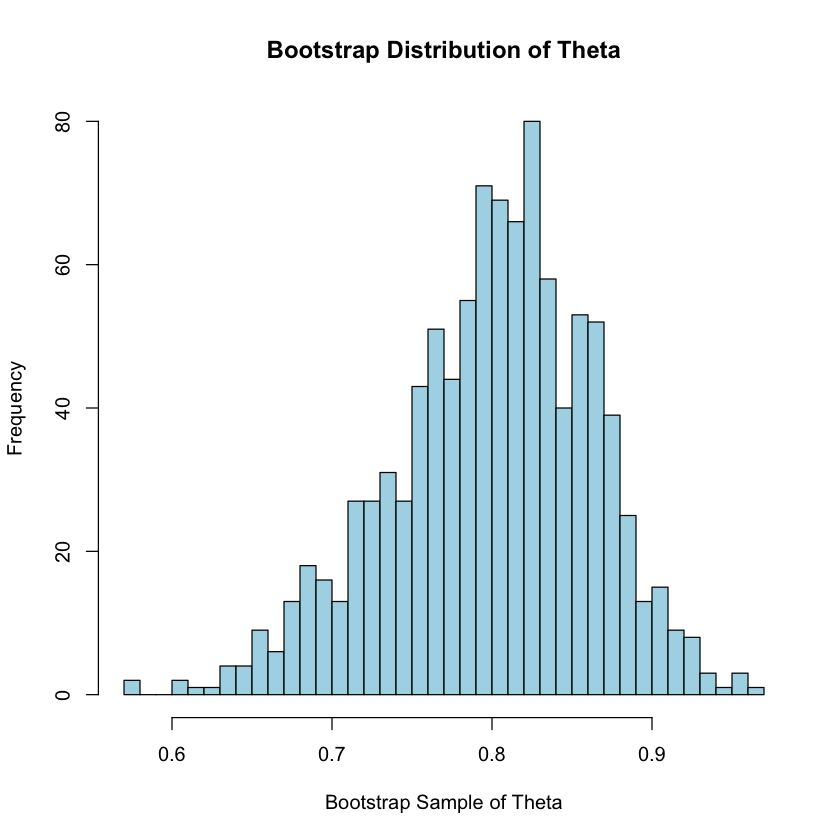

In [12]:
# Vẽ biểu đồ phân phối của các mẫu bootstrap
hist(ketqua$t, breaks = 30, main = "Bootstrap Distribution of Theta", xlab = "Bootstrap Sample of Theta", col = "lightblue", border = "black")